In [ ]:
#Read the Dataset

import pandas as pd

file = '/content/drive/MyDrive/Data Science Data Challenge/CHAMPS(Processed).csv'
data = pd.read_csv(file)

data.head()

,packet_version_id,id_ver_nmb,Champs_ID (Mortality),dp_001,dp_002,dp_003,dp_004,dp_005,dp_006,dp_007,...,dpf_012___ch00040,dpf_012___ch00041,dpf_012___ch00042,dpf_012___ch00043,dpf_012___ch01424,dpf_012___ch01875,dpf_012___ch00010,dpf_013,dpf_014,crf_060302_decode_panel_feedback_form_complete
0,ETAA00002_01_01,2.0.0,ETAA00002,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,Tseyon Tesfaye Clinical,NaN,2
1,ETAA00004_01_02,2.0.0,ETAA00004,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,"Adugna (SBS team), Tigistu (counselor), Tseyon...",NaN,2
2,ETAA00005_01_02,2.0.0,ETAA00005,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,"Adugna (SBS team), Tigistu (counselor), Tseyon...",NaN,2
3,ETAA00008_01_04,2.0.0,ETAA00008,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,"Abdurahman Yonis(HO), Eyoel Taye(counselor), G...",The family leaves in a refugee camp and even t...,2
4,ETAA00009_01_01,2.0.0,ETAA00009,5,18,19,20,21.0,7.0,NaN,...,0,0,0,0,0,0,0,NaN,NaN,0


Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  1   3  17  21  23  24  25  26  27  28  35  39  46  48  50  51  52  56
  57  58  59  60  61  62  66  68  70  71  72  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 134 135 136 137 138 139 140 143 145 147 148 150 165
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220
 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238
 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256
 267 272 278 287 290 293 294 295 296 297 298 299 300 301 302 303 304 305
 309 313 317 321 323 325 328 331 334 335 336 337 338 339 340 341 342 343
 344 3

Logistic Regression Accuracy: 1.0


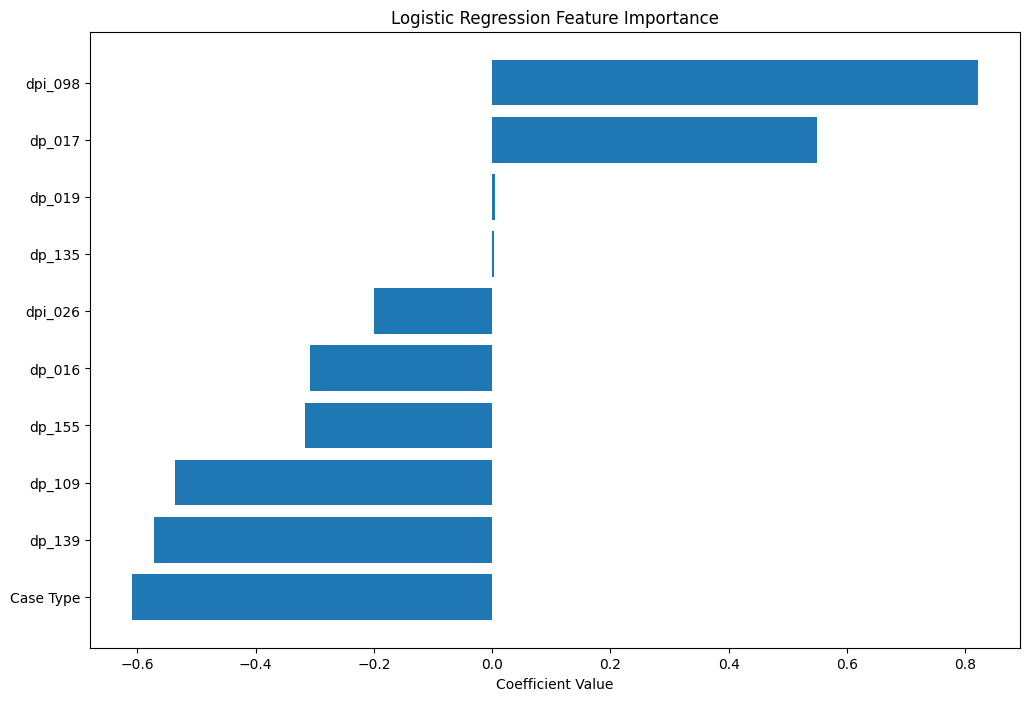

In [11]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


top_three_causes = data['Condition'].value_counts().nlargest(3).index.tolist()
filtered_data = data[data['Condition'].isin(top_three_causes)]

label_encoder = LabelEncoder()
X = filtered_data.drop(columns=['Condition'])
X_encoded = X.apply(label_encoder.fit_transform)
y = label_encoder.fit_transform(filtered_data['Condition'])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_selected, y_train)
accuracy = log_reg.score(X_test_selected, y_test)
print(f'Logistic Regression Accuracy: {accuracy}')

# Plot feature importance
coefficients = log_reg.coef_[0]
features = X.columns[selector.get_support()]
sorted_indices = np.argsort(coefficients)
sorted_features = features[sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

plt.figure(figsize=(12, 8))
plt.barh(sorted_features, sorted_coefficients)
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Feature Importance')
plt.show()


Support Vector Machine (SVM)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  1   3  17  21  23  24  25  26  27  28  35  39  46  48  50  51  52  56
  57  58  59  60  61  62  66  68  70  71  72  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 134 135 136 137 138 139 140 143 145 147 148 150 165
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220
 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238
 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256
 267 272 278 287 290 293 294 295 296 297 298 299 300 301 302 303 304 305
 309 313 317 321 323 325 328 331 334 335 336 337 338 339 340 341 342 343
 344 3

SVM Accuracy: 1.0


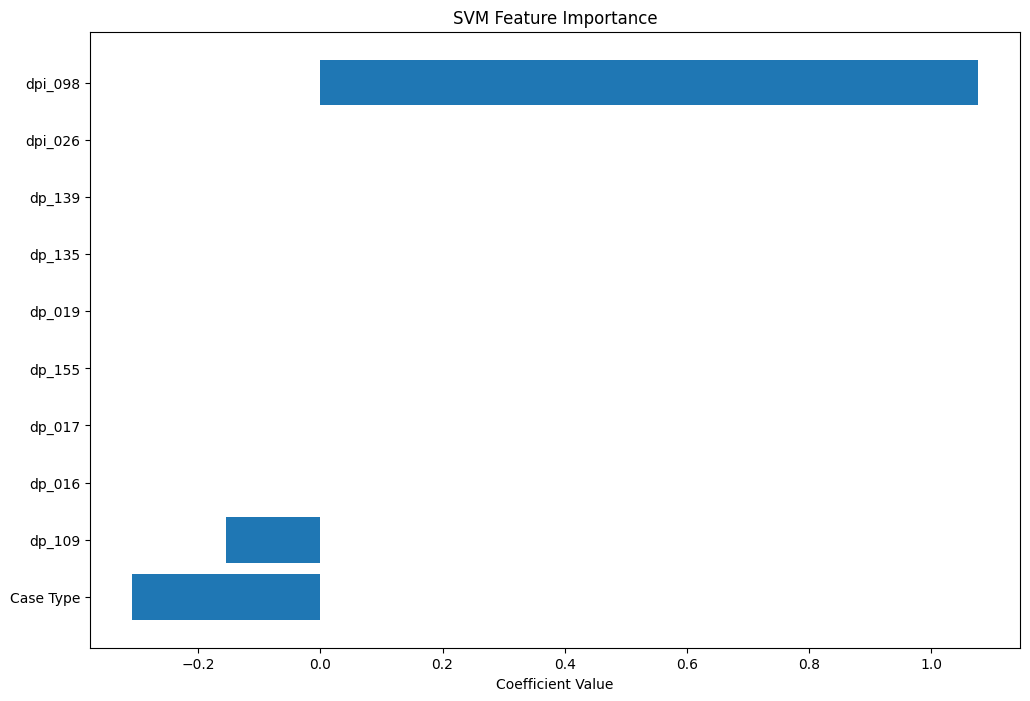

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np


top_three_causes = data['Condition'].value_counts().nlargest(3).index.tolist()
filtered_data = data[data['Condition'].isin(top_three_causes)]

label_encoder = LabelEncoder()
X = filtered_data.drop(columns=['Condition'])
X_encoded = X.apply(label_encoder.fit_transform)
y = label_encoder.fit_transform(filtered_data['Condition'])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train SVM model
svm = SVC(kernel='linear')
svm.fit(X_train_selected, y_train)
accuracy = svm.score(X_test_selected, y_test)
print(f'SVM Accuracy: {accuracy}')

# Plot feature importance
coefficients = svm.coef_[0]
features = X.columns[selector.get_support()]
sorted_indices = np.argsort(coefficients)
sorted_features = features[sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

plt.figure(figsize=(12, 8))
plt.barh(sorted_features, sorted_coefficients)
plt.xlabel('Coefficient Value')
plt.title('SVM Feature Importance')
plt.show()


AdaBoost Classifier

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  1   3  17  21  23  24  25  26  27  28  35  39  46  48  50  51  52  56
  57  58  59  60  61  62  66  68  70  71  72  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 134 135 136 137 138 139 140 143 145 147 148 150 165
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220
 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238
 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256
 267 272 278 287 290 293 294 295 296 297 298 299 300 301 302 303 304 305
 309 313 317 321 323 325 328 331 334 335 336 337 338 339 340 341 342 343
 344 3

AdaBoost Accuracy: 1.0


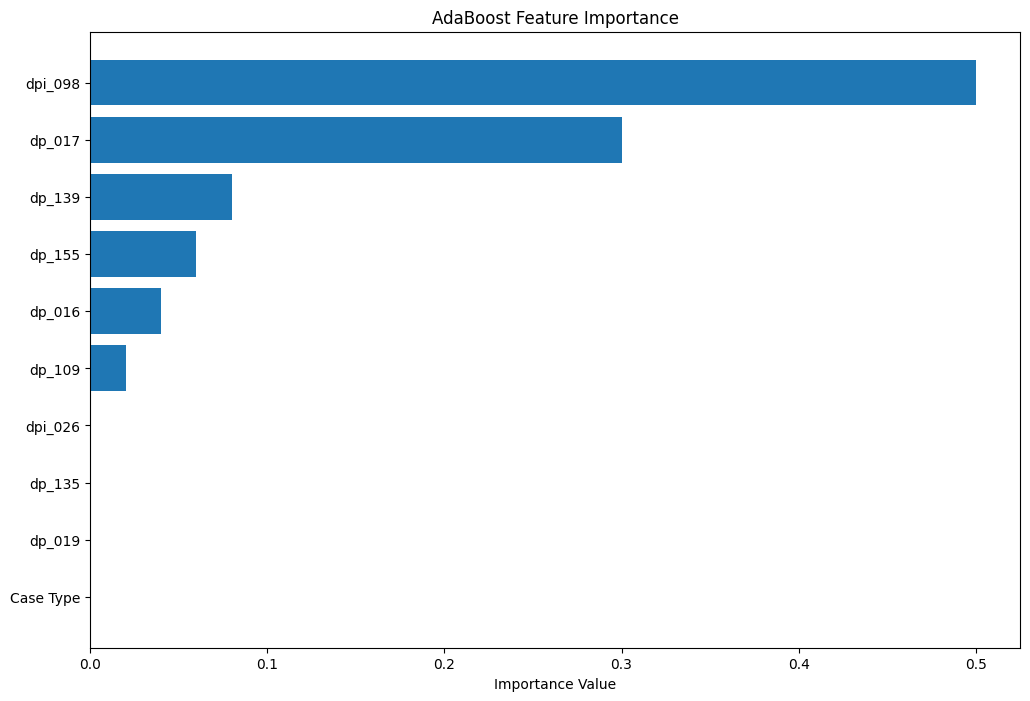

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import numpy as np


top_three_causes = data['Condition'].value_counts().nlargest(3).index.tolist()
filtered_data = data[data['Condition'].isin(top_three_causes)]

label_encoder = LabelEncoder()
X = filtered_data.drop(columns=['Condition'])
X_encoded = X.apply(label_encoder.fit_transform)
y = label_encoder.fit_transform(filtered_data['Condition'])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train AdaBoost model
ada = AdaBoostClassifier()
ada.fit(X_train_selected, y_train)
accuracy = ada.score(X_test_selected, y_test)
print(f'AdaBoost Accuracy: {accuracy}')

# Plot feature importance
importances = ada.feature_importances_
features = X.columns[selector.get_support()]
sorted_indices = np.argsort(importances)
sorted_features = features[sorted_indices]
sorted_importances = importances[sorted_indices]

plt.figure(figsize=(12, 8))
plt.barh(sorted_features, sorted_importances)
plt.xlabel('Importance Value')
plt.title('AdaBoost Feature Importance')
plt.show()


Random Forest Classifier

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  1   3  17  21  23  24  25  26  27  28  35  39  46  48  50  51  52  56
  57  58  59  60  61  62  66  68  70  71  72  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 134 135 136 137 138 139 140 143 145 147 148 150 165
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220
 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238
 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256
 267 272 278 287 290 293 294 295 296 297 298 299 300 301 302 303 304 305
 309 313 317 321 323 325 328 331 334 335 336 337 338 339 340 341 342 343
 344 3

Random Forest Accuracy: 1.0


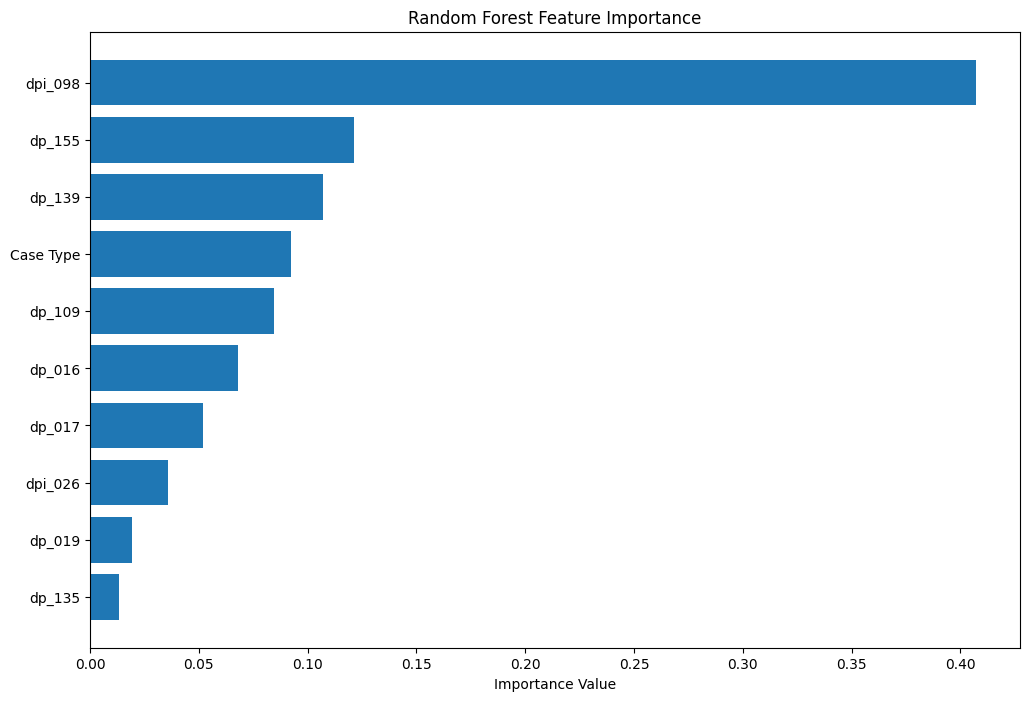

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np


top_three_causes = data['Condition'].value_counts().nlargest(3).index.tolist()
filtered_data = data[data['Condition'].isin(top_three_causes)]

label_encoder = LabelEncoder()
X = filtered_data.drop(columns=['Condition'])
X_encoded = X.apply(label_encoder.fit_transform)
y = label_encoder.fit_transform(filtered_data['Condition'])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train_selected, y_train)
accuracy = rf.score(X_test_selected, y_test)
print(f'Random Forest Accuracy: {accuracy}')

# Plot feature importance
importances = rf.feature_importances_
features = X.columns[selector.get_support()]
sorted_indices = np.argsort(importances)
sorted_features = features[sorted_indices]
sorted_importances = importances[sorted_indices]

plt.figure(figsize=(12, 8))
plt.barh(sorted_features, sorted_importances)
plt.xlabel('Importance Value')
plt.title('Random Forest Feature Importance')
plt.show()


Gradient Boosting Classifier

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  1   3  17  21  23  24  25  26  27  28  35  39  46  48  50  51  52  56
  57  58  59  60  61  62  66  68  70  71  72  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 134 135 136 137 138 139 140 143 145 147 148 150 165
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220
 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238
 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256
 267 272 278 287 290 293 294 295 296 297 298 299 300 301 302 303 304 305
 309 313 317 321 323 325 328 331 334 335 336 337 338 339 340 341 342 343
 344 3

Gradient Boosting Accuracy: 1.0


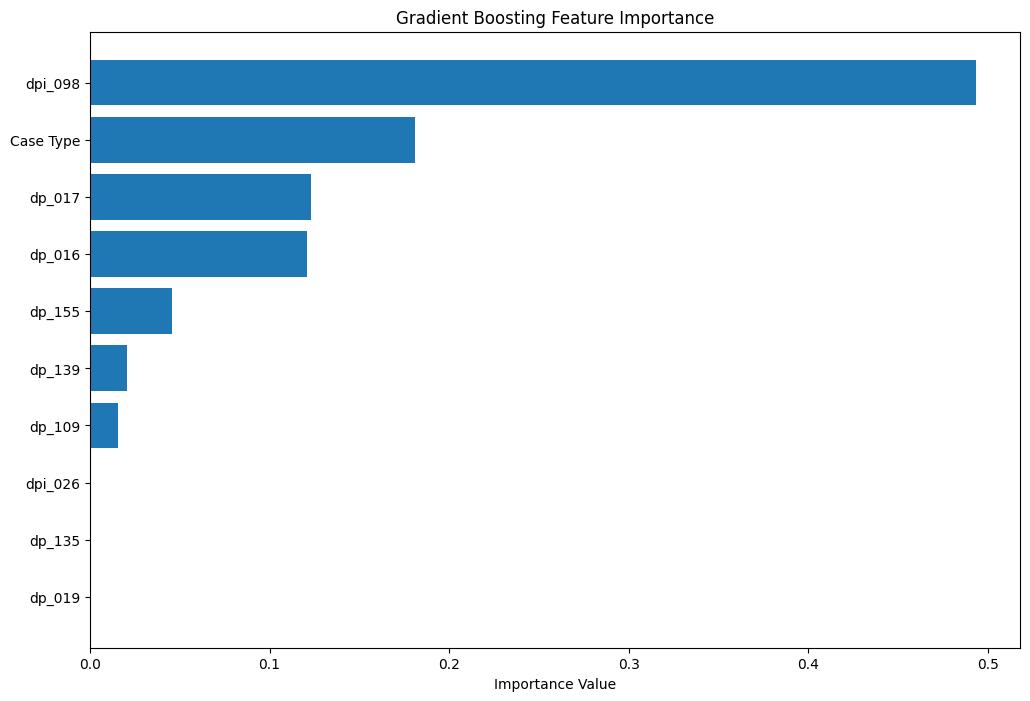

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import numpy as np


top_three_causes = data['Condition'].value_counts().nlargest(3).index.tolist()
filtered_data = data[data['Condition'].isin(top_three_causes)]

label_encoder = LabelEncoder()
X = filtered_data.drop(columns=['Condition'])
X_encoded = X.apply(label_encoder.fit_transform)
y = label_encoder.fit_transform(filtered_data['Condition'])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train Gradient Boosting model
gb = GradientBoostingClassifier()
gb.fit(X_train_selected, y_train)
accuracy = gb.score(X_test_selected, y_test)
print(f'Gradient Boosting Accuracy: {accuracy}')

# Plot feature importance
importances = gb.feature_importances_
features = X.columns[selector.get_support()]
sorted_indices = np.argsort(importances)
sorted_features = features[sorted_indices]
sorted_importances = importances[sorted_indices]

plt.figure(figsize=(12, 8))
plt.barh(sorted_features, sorted_importances)
plt.xlabel('Importance Value')
plt.title('Gradient Boosting Feature Importance')
plt.show()


XGBoost Classifier

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  1   3  17  21  23  24  25  26  27  28  35  39  46  48  50  51  52  56
  57  58  59  60  61  62  66  68  70  71  72  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 134 135 136 137 138 139 140 143 145 147 148 150 165
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220
 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238
 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256
 267 272 278 287 290 293 294 295 296 297 298 299 300 301 302 303 304 305
 309 313 317 321 323 325 328 331 334 335 336 337 338 339 340 341 342 343
 344 3

XGBoost Accuracy: 1.0


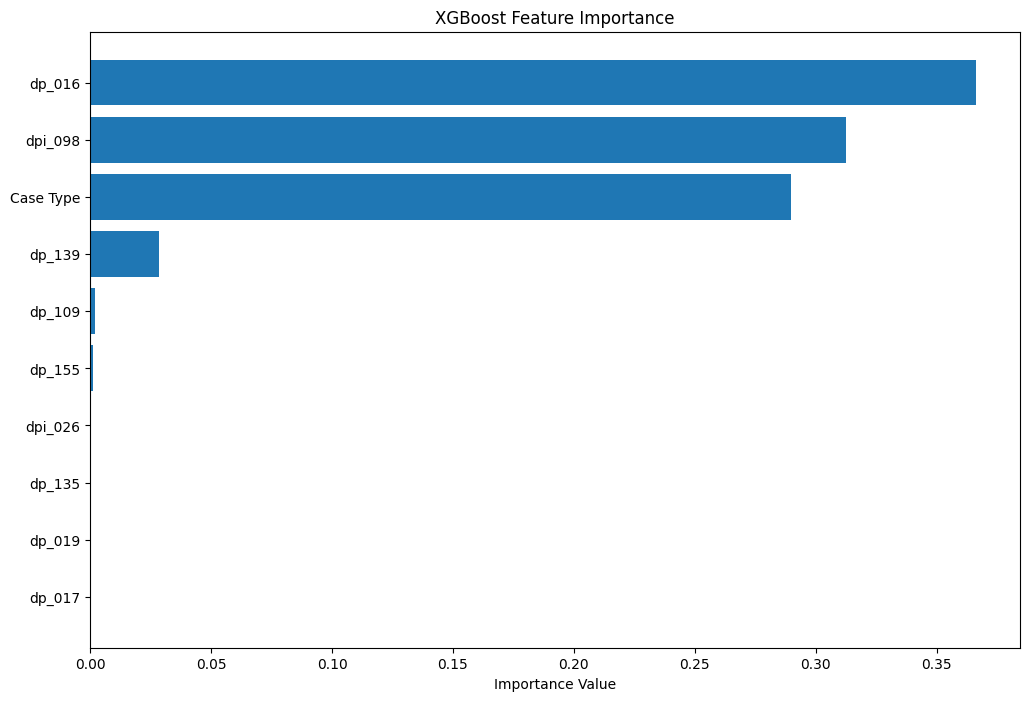

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np


top_three_causes = data['Condition'].value_counts().nlargest(3).index.tolist()
filtered_data = data[data['Condition'].isin(top_three_causes)]

label_encoder = LabelEncoder()
X = filtered_data.drop(columns=['Condition'])
X_encoded = X.apply(label_encoder.fit_transform)
y = label_encoder.fit_transform(filtered_data['Condition'])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_selected, y_train)
accuracy = xgb_model.score(X_test_selected, y_test)
print(f'XGBoost Accuracy: {accuracy}')

# Plot feature importance
importances = xgb_model.feature_importances_
features = X.columns[selector.get_support()]
sorted_indices = np.argsort(importances)
sorted_features = features[sorted_indices]
sorted_importances = importances[sorted_indices]

plt.figure(figsize=(12, 8))
plt.barh(sorted_features, sorted_importances)
plt.xlabel('Importance Value')
plt.title('XGBoost Feature Importance')
plt.show()
